# Data Analysis and ML - for Mining Sector and Petrographic Lab
### Yagiz SEZERSAN

Petrographic Lab gives services like from preparing slide sections to in-depth petrographic analyses, we provide quick, confidential and courteous service with an emphasis on quality.
In addition to our full range of petrographic services, we have developed specialized techniques in the preparation of thin sections of unusual materials such as soluble minerals, soil, clay, fossils, archaeological artifacts and kimberlites.

Thus, I will use two datasets:
 * 1 - Dataset that provides information about the total world production of mineral raw materials
 https://www.world-mining-data.info/?World_Mining_Data___Data_Section
 * 2 - Dataset from their database("VanPetroDatabase"). Since they know I am going to submit it to college, they manipulated the data little bit and if they like what I am trying to do, they will let me to do analysis with their real data in future

## Dataset 1 (World Mining Data) - Classification 

This dataset will serve as valuable resources for understanding the world mining landscape, identifying trends, making informed decisions, and drawing meaningful conclusions about the mining industry on a global scale. 

1. PetroDataset.xlsx:
This dataset provides information about the total world production of mineral raw materials for a specific time period. It likely includes data on the overall production quantities of various minerals on a global scale.

2. GroupsCommodities.xlsx:
This dataset presents data on the production of mineral raw materials categorized by the specific type of mineral.

3. IncomeLvl.xlsx:
This dataset includes data on the annual per capita income of different countries or regions involved in the mining industry. 

4. Political stability.xlsx:
This dataset offers information about the political stability of various countries or regions where mining activities occur. Analyzing political stability data can help assess the risks associated with mining investments and operations in different regions.

#### My aim is to combine different data sets to provide data analysis about mining sector

Info about final cleaned dataset and features :

- year (continuous): The year in which the order was collected or recorded.

- value (continuous): A numerical value associated with volume of material production.

- income_group_encoded (categorical): An encoded representation of the income group to which the sample belongs.

- groupscommodity_encoded (categorical): An encoded representation of the commodity group.

- region_encoded (categorical): An encoded representation of the region.

- politicsest_encoded (categorical): An encoded representation of the political situation.

#### - Load the python library and read the data

In [765]:
# Necessary libraries for Project
# Further libraries can be added in later sections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

%matplotlib inline

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [766]:
# Import excel file
df = pd.read_excel('Dataset/WorldMiningDataset/PetroDataset.xlsx')

# Display the first few rows of dataset
df.head()

,Material,Country,unit,datasource,2017,2018,2019,2020,2021
0,Iron,Algeria,metr. t,e,268400.0,381200.0,409900.0,406600.0,416000
1,Iron,Angola,metr. t,r,NaN,NaN,NaN,0.0,37610
2,Iron,Argentina,metr. t,r,28400.0,40560.0,0.0,0.0,0
3,Iron,Australia,metr. t,r,548297062.0,560054570.0,567957086.0,568384644.0,571113897
4,Iron,Austria,metr. t,r,954156.0,897132.0,1037470.0,973840.0,1059550


#### - Year should be indicated as row i/o column to perform better analysis

In [767]:
# Specify the columns to melt
columns_to_melt = ['Material', 'Country', 'unit','datasource', '2017', '2018', '2019', '2020', '2021']

# Melt the year columns into a single column
df_melted = pd.melt(df, id_vars=columns_to_melt[:4], value_vars=columns_to_melt[4:], value_name='Value', var_name='Year')

# Sort dataFrame by original column names
df_melted.sort_values(by='Year', inplace=True)

# Reset index of the melted DataFrame
df_melted.reset_index(drop=True, inplace=True)

# Print the melted DataFrame
df_melted

,Material,Country,unit,datasource,Year,Value
0,Iron,Algeria,metr. t,e,2017,268400.0
1,Magnesite,Poland,metr. t,r,2017,101920.0
2,Magnesite,Philippines,metr. t,r,2017,200.0
3,Magnesite,Pakistan,metr. t,r,2017,19656.0
4,Magnesite,Mexico,metr. t,r,2017,101000.0
...,...,...,...,...,...,...
9565,Zinc,Finland,metr. t,r,2021,59080.0
9566,Zinc,Eritrea,metr. t,r,2021,129641.0
9567,Zinc,Dominican Republic,metr. t,r,2021,4986.0
9568,Zinc,"Korea, South",metr. t,r,2021,4370.0


#### - Now we have single year column since I would like to use one dataset, Politicalstability will be merged 

In [768]:
# Read Politicalstability dataset and use Sheet2
politics_excel = pd.read_excel("Dataset/WorldMiningDataset/Politicalstability.xlsx",sheet_name= "Sheet2")
politics_excel.head()

,Country,Code,PoliticsEst
0,Aruba,ABW,1.474335
1,Andorra,ADO,1.631809
2,Afghanistan,AFG,-2.529855
3,Angola,AGO,-0.710836
4,Anguilla,AIA,1.585498


In [769]:
# Merged two datasets via using primary key as Country
mergedExcel = pd.merge(df_melted,politics_excel, on= "Country")
mergedExcel

,Material,Country,unit,datasource,Year,Value,Code,PoliticsEst
0,Iron,Algeria,metr. t,e,2017,268400.0,DZA,-0.876465
1,Phosphate Rock (P2O5),Algeria,metr. t,r,2017,378100.0,DZA,-0.876465
2,Kaolin (China-Clay),Algeria,metr. t,e,2017,100000.0,DZA,-0.876465
3,"Salt (rock, brines, marine)",Algeria,metr. t,e,2017,165000.0,DZA,-0.876465
4,Feldspar,Algeria,metr. t,e,2017,170000.0,DZA,-0.876465
...,...,...,...,...,...,...,...,...
8070,Gold,French Guiana,kg,r,2017,1486.0,GUF,0.312546
8071,Gold,French Guiana,kg,r,2018,1320.0,GUF,0.312546
8072,Gold,French Guiana,kg,r,2019,1157.0,GUF,0.312546
8073,Gold,French Guiana,kg,r,2020,1058.0,GUF,0.312546


In [770]:
# Display the dataset info
mergedExcel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8075 entries, 0 to 8074
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Material     8075 non-null   object 
 1   Country      8075 non-null   object 
 2   unit         8075 non-null   object 
 3   datasource   8075 non-null   object 
 4   Year         8075 non-null   object 
 5   Value        8036 non-null   float64
 6   Code         8075 non-null   object 
 7   PoliticsEst  8075 non-null   float64
dtypes: float64(2), object(6)
memory usage: 567.8+ KB


#### - Since I would like to use one dataset, income dataset will be merged 

In [771]:
# Read IncomeLvl dataset and use Sheet "List"
income = pd.read_excel("Dataset/WorldMiningDataset/IncomeLvl.xlsx", sheet_name = "List")
income

,Country,Code,Region,Income group,Lending category
0,Aruba,ABW,Latin America & Caribbean,High income,NaN
1,Afghanistan,AFG,South Asia,Low income,IDA
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD
3,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD
4,Andorra,AND,Europe & Central Asia,High income,NaN
...,...,...,...,...,...
213,Kosovo,XKX,Europe & Central Asia,Upper middle income,IDA
214,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,IDA
215,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,IBRD
216,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,IDA


In [772]:
# Merged two datasets via using primary key as Country again since it is the most useful one
merged2 = pd.merge(mergedExcel, income, on = "Country")
merged2

,Material,Country,unit,datasource,Year,Value,Code_x,PoliticsEst,Code_y,Region,Income group,Lending category
0,Iron,Algeria,metr. t,e,2017,268400.0,DZA,-0.876465,DZA,Middle East & North Africa,Lower middle income,IBRD
1,Phosphate Rock (P2O5),Algeria,metr. t,r,2017,378100.0,DZA,-0.876465,DZA,Middle East & North Africa,Lower middle income,IBRD
2,Kaolin (China-Clay),Algeria,metr. t,e,2017,100000.0,DZA,-0.876465,DZA,Middle East & North Africa,Lower middle income,IBRD
3,"Salt (rock, brines, marine)",Algeria,metr. t,e,2017,165000.0,DZA,-0.876465,DZA,Middle East & North Africa,Lower middle income,IBRD
4,Feldspar,Algeria,metr. t,e,2017,170000.0,DZA,-0.876465,DZA,Middle East & North Africa,Lower middle income,IBRD
...,...,...,...,...,...,...,...,...,...,...,...,...
8005,Silver,Mali,kg,e,2019,3000.0,MLI,-2.352437,MLI,Sub-Saharan Africa,Low income,IDA
8006,Gold,Mali,kg,r,2020,71200.0,MLI,-2.352437,MLI,Sub-Saharan Africa,Low income,IDA
8007,Silver,Mali,kg,e,2020,3000.0,MLI,-2.352437,MLI,Sub-Saharan Africa,Low income,IDA
8008,Gold,Mali,kg,r,2021,69400.0,MLI,-2.352437,MLI,Sub-Saharan Africa,Low income,IDA


In [773]:
# Check info again about dataset
merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8010 entries, 0 to 8009
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Material          8010 non-null   object 
 1   Country           8010 non-null   object 
 2   unit              8010 non-null   object 
 3   datasource        8010 non-null   object 
 4   Year              8010 non-null   object 
 5   Value             7971 non-null   float64
 6   Code_x            8010 non-null   object 
 7   PoliticsEst       8010 non-null   float64
 8   Code_y            8010 non-null   object 
 9   Region            8010 non-null   object 
 10  Income group      8010 non-null   object 
 11  Lending category  5790 non-null   object 
dtypes: float64(2), object(10)
memory usage: 813.5+ KB


#### - Material excel will be merged from another source to have complete dataset

In [774]:
# Read GroupsCommodities dataset 
groupComm = pd.read_excel("Dataset/WorldMiningDataset/GroupsCommodities.xlsx")
groupComm

,GroupsCommodity,Material
0,Iron & Ferro-Alloy Metals,Iron
1,Iron & Ferro-Alloy Metals,Chromium
2,Iron & Ferro-Alloy Metals,Cobalt
3,Iron & Ferro-Alloy Metals,Manganese
4,Iron & Ferro-Alloy Metals,Molybdenum
...,...,...
62,Mineral Fuels,Petroleum
63,Mineral Fuels,Natural Gas
64,Mineral Fuels,Oil Sands*
65,Mineral Fuels,Oil Shales


In [775]:
# Merged two datasets via using primary key as Material
merged3 = pd.merge(merged2,groupComm, on = "Material")
merged3

,Material,Country,unit,datasource,Year,Value,Code_x,PoliticsEst,Code_y,Region,Income group,Lending category,GroupsCommodity
0,Iron,Algeria,metr. t,e,2017,268400.0,DZA,-0.876465,DZA,Middle East & North Africa,Lower middle income,IBRD,Iron & Ferro-Alloy Metals
1,Iron,Algeria,metr. t,e,2018,381200.0,DZA,-0.876465,DZA,Middle East & North Africa,Lower middle income,IBRD,Iron & Ferro-Alloy Metals
2,Iron,Algeria,metr. t,e,2019,409900.0,DZA,-0.876465,DZA,Middle East & North Africa,Lower middle income,IBRD,Iron & Ferro-Alloy Metals
3,Iron,Algeria,metr. t,e,2020,406600.0,DZA,-0.876465,DZA,Middle East & North Africa,Lower middle income,IBRD,Iron & Ferro-Alloy Metals
4,Iron,Algeria,metr. t,e,2021,416000.0,DZA,-0.876465,DZA,Middle East & North Africa,Lower middle income,IBRD,Iron & Ferro-Alloy Metals
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5305,Oil Shales,Estonia,metr. t,r,2017,21625000.0,EST,0.755604,EST,Europe & Central Asia,High income,NaN,Mineral Fuels
5306,Oil Shales,Estonia,metr. t,r,2018,21883000.0,EST,0.755604,EST,Europe & Central Asia,High income,NaN,Mineral Fuels
5307,Oil Shales,Estonia,metr. t,r,2019,15697400.0,EST,0.755604,EST,Europe & Central Asia,High income,NaN,Mineral Fuels
5308,Oil Shales,Estonia,metr. t,r,2020,12144400.0,EST,0.755604,EST,Europe & Central Asia,High income,NaN,Mineral Fuels


#### - Finally we have final dataset so we can start with Data Preparation

In [776]:
# Check info about dataset and ensure that there is any null data 
merged3.info()
print()
merged3.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5310 entries, 0 to 5309
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Material          5310 non-null   object 
 1   Country           5310 non-null   object 
 2   unit              5310 non-null   object 
 3   datasource        5310 non-null   object 
 4   Year              5310 non-null   object 
 5   Value             5276 non-null   float64
 6   Code_x            5310 non-null   object 
 7   PoliticsEst       5310 non-null   float64
 8   Code_y            5310 non-null   object 
 9   Region            5310 non-null   object 
 10  Income group      5310 non-null   object 
 11  Lending category  3830 non-null   object 
 12  GroupsCommodity   5310 non-null   object 
dtypes: float64(2), object(11)
memory usage: 580.8+ KB



Material               0
Country                0
unit                   0
datasource             0
Year                   0
Value                 34
Code_x                 0
PoliticsEst            0
Code_y                 0
Region                 0
Income group           0
Lending category    1480
GroupsCommodity        0
dtype: int64

In [777]:
# Drop unnecessary columns and "Lending category" columns which have many null data
df1 = merged3
df1.drop(["Lending category","Code_x","Code_y","datasource"], axis = 1,inplace = True)
df1.dropna(inplace=True)

In [778]:
# See current status of our dataset
df1.info()
print()
df1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5276 entries, 0 to 5309
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Material         5276 non-null   object 
 1   Country          5276 non-null   object 
 2   unit             5276 non-null   object 
 3   Year             5276 non-null   object 
 4   Value            5276 non-null   float64
 5   PoliticsEst      5276 non-null   float64
 6   Region           5276 non-null   object 
 7   Income group     5276 non-null   object 
 8   GroupsCommodity  5276 non-null   object 
dtypes: float64(2), object(7)
memory usage: 412.2+ KB



,Material,Country,unit,Year,Value,PoliticsEst,Region,Income group,GroupsCommodity
0,Iron,Algeria,metr. t,2017,268400.0,-0.876465,Middle East & North Africa,Lower middle income,Iron & Ferro-Alloy Metals
1,Iron,Algeria,metr. t,2018,381200.0,-0.876465,Middle East & North Africa,Lower middle income,Iron & Ferro-Alloy Metals
2,Iron,Algeria,metr. t,2019,409900.0,-0.876465,Middle East & North Africa,Lower middle income,Iron & Ferro-Alloy Metals
3,Iron,Algeria,metr. t,2020,406600.0,-0.876465,Middle East & North Africa,Lower middle income,Iron & Ferro-Alloy Metals
4,Iron,Algeria,metr. t,2021,416000.0,-0.876465,Middle East & North Africa,Lower middle income,Iron & Ferro-Alloy Metals
...,...,...,...,...,...,...,...,...,...
5305,Oil Shales,Estonia,metr. t,2017,21625000.0,0.755604,Europe & Central Asia,High income,Mineral Fuels
5306,Oil Shales,Estonia,metr. t,2018,21883000.0,0.755604,Europe & Central Asia,High income,Mineral Fuels
5307,Oil Shales,Estonia,metr. t,2019,15697400.0,0.755604,Europe & Central Asia,High income,Mineral Fuels
5308,Oil Shales,Estonia,metr. t,2020,12144400.0,0.755604,Europe & Central Asia,High income,Mineral Fuels


### - Decided to follow classification to guess Politic situation

In [779]:
# Formula to tranform Politic status good or bad i/o wide range of numeric values
def calculate_stability(politics_est):
    if politics_est < 0:
        return "Unstable"
    elif politics_est >= 0:
        return "Stable"

In [780]:
# Apply formula
df1['PoliticsEst'] = df1['PoliticsEst'].apply(calculate_stability)

# List related columns to be sure that formula is worked
df1['PoliticsEst']

0       Unstable
1       Unstable
2       Unstable
3       Unstable
4       Unstable
          ...   
5305      Stable
5306      Stable
5307      Stable
5308      Stable
5309      Stable
Name: PoliticsEst, Length: 5276, dtype: object

In [781]:
# List Material value counts
# Seems it so massive data and transformation would not so logical
df1.Material.value_counts()

Petroleum      438
Gold           431
Natural Gas    397
Silver         301
Copper         254
Zinc           235
Iron           229
Bentonite      215
Lead           204
Feldspar       200
Aluminium      170
Manganese      150
Bauxite        135
Baryte         125
Nickel         119
Lignite        115
Tin            108
Fluorspar      103
Magnesite       95
Diatomite       95
Coking Coal     90
Zircon          85
Selenium        85
Cadmium         80
Graphite        79
Cobalt          75
Antimony        65
Molybdenum      60
Perlite         60
Bismuth         50
Platinum        50
Palladium       49
Vermiculite     45
Indium          40
Mercury         35
Rhenium         35
Arsenic         35
Tellurium       35
Oil Shales      29
Germanium       20
Asbestos        20
Rhodium         20
Gallium         15
Name: Material, dtype: int64

In [782]:
# Get last 2 digits of year for Year columns
df1["Year"] = df1["Year"].astype(str).str[-2:]
df1["Year"]

0       17
1       18
2       19
3       20
4       21
        ..
5305    17
5306    18
5307    19
5308    20
5309    21
Name: Year, Length: 5276, dtype: object

#### -  List value counts for all objects columns via using loop

In [783]:
# List all value counts 
for column in df1.columns:
    value_counts = df1[column].value_counts()
    print(f"Value counts for {column}:")
    print(value_counts)
    print()

Value counts for Material:
Petroleum      438
Gold           431
Natural Gas    397
Silver         301
Copper         254
Zinc           235
Iron           229
Bentonite      215
Lead           204
Feldspar       200
Aluminium      170
Manganese      150
Bauxite        135
Baryte         125
Nickel         119
Lignite        115
Tin            108
Fluorspar      103
Magnesite       95
Diatomite       95
Coking Coal     90
Zircon          85
Selenium        85
Cadmium         80
Graphite        79
Cobalt          75
Antimony        65
Molybdenum      60
Perlite         60
Bismuth         50
Platinum        50
Palladium       49
Vermiculite     45
Indium          40
Mercury         35
Rhenium         35
Arsenic         35
Tellurium       35
Oil Shales      29
Germanium       20
Asbestos        20
Rhodium         20
Gallium         15
Name: Material, dtype: int64

Value counts for Country:
China            195
United States    160
Brazil           135
Canada           135
Australia       

In [784]:
# Drop related columns which have much of value_counts
df1.drop(["Material","Country","unit"], axis=1, inplace= True)

In [785]:
# View last status of dataset
df1.head()

,Year,Value,PoliticsEst,Region,Income group,GroupsCommodity
0,17,268400.0,Unstable,Middle East & North Africa,Lower middle income,Iron & Ferro-Alloy Metals
1,18,381200.0,Unstable,Middle East & North Africa,Lower middle income,Iron & Ferro-Alloy Metals
2,19,409900.0,Unstable,Middle East & North Africa,Lower middle income,Iron & Ferro-Alloy Metals
3,20,406600.0,Unstable,Middle East & North Africa,Lower middle income,Iron & Ferro-Alloy Metals
4,21,416000.0,Unstable,Middle East & North Africa,Lower middle income,Iron & Ferro-Alloy Metals


In [786]:
# Update hypen as underscore for columns and remove dots
df1.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)
df1.rename(columns=lambda x: x.replace(".", ""), inplace=True)
df1.head()

,Year,Value,PoliticsEst,Region,Income_group,GroupsCommodity
0,17,268400.0,Unstable,Middle East & North Africa,Lower middle income,Iron & Ferro-Alloy Metals
1,18,381200.0,Unstable,Middle East & North Africa,Lower middle income,Iron & Ferro-Alloy Metals
2,19,409900.0,Unstable,Middle East & North Africa,Lower middle income,Iron & Ferro-Alloy Metals
3,20,406600.0,Unstable,Middle East & North Africa,Lower middle income,Iron & Ferro-Alloy Metals
4,21,416000.0,Unstable,Middle East & North Africa,Lower middle income,Iron & Ferro-Alloy Metals


### Transformation

#### - Label Encoder

Apply LabelEncoder for the columns since have less unique value and transform them as numeric value

In [787]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Income_group', 'GroupsCommodity','Region','PoliticsEst']

# Apply LabelEncoder to each column
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df1[column+'_encoded'] = label_encoder.fit_transform(df1[column])

# Print updated dataset
df1.head()

,Year,Value,PoliticsEst,Region,Income_group,GroupsCommodity,Income_group_encoded,GroupsCommodity_encoded,Region_encoded,PoliticsEst_encoded
0,17,268400.0,Unstable,Middle East & North Africa,Lower middle income,Iron & Ferro-Alloy Metals,2,1,3,1
1,18,381200.0,Unstable,Middle East & North Africa,Lower middle income,Iron & Ferro-Alloy Metals,2,1,3,1
2,19,409900.0,Unstable,Middle East & North Africa,Lower middle income,Iron & Ferro-Alloy Metals,2,1,3,1
3,20,406600.0,Unstable,Middle East & North Africa,Lower middle income,Iron & Ferro-Alloy Metals,2,1,3,1
4,21,416000.0,Unstable,Middle East & North Africa,Lower middle income,Iron & Ferro-Alloy Metals,2,1,3,1


In [788]:
# Drop previous columns since new ones are created via LabelEncoder
df1.drop(['Income_group', 'GroupsCommodity','Region','PoliticsEst'], axis = 1,inplace = True)

#### - Log transform

In [789]:
# Transform value columns via using log transform
df1['Value'] = df1['Value'].apply(lambda x: np.log1p(x))

In [790]:
# List info about dataset
df1.info()
# Currently there is no any null data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5276 entries, 0 to 5309
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     5276 non-null   object 
 1   Value                    5276 non-null   float64
 2   Income_group_encoded     5276 non-null   int32  
 3   GroupsCommodity_encoded  5276 non-null   int32  
 4   Region_encoded           5276 non-null   int32  
 5   PoliticsEst_encoded      5276 non-null   int32  
dtypes: float64(1), int32(4), object(1)
memory usage: 206.1+ KB


In [791]:
# Year seems object so it needs to be numeric
df1.Year = df1.Year.astype("float64")

In [792]:
# All columns dataTypes are numeric now
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5276 entries, 0 to 5309
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     5276 non-null   float64
 1   Value                    5276 non-null   float64
 2   Income_group_encoded     5276 non-null   int32  
 3   GroupsCommodity_encoded  5276 non-null   int32  
 4   Region_encoded           5276 non-null   int32  
 5   PoliticsEst_encoded      5276 non-null   int32  
dtypes: float64(2), int32(4)
memory usage: 206.1 KB


In [793]:
# Use lambda to make lower columns for further analysis
df1.rename(columns=lambda x: x.lower(), inplace=True)
df1

,year,value,income_group_encoded,groupscommodity_encoded,region_encoded,politicsest_encoded
0,17.0,12.500237,2,1,3,1
1,18.0,12.851082,2,1,3,1
2,19.0,12.923671,2,1,3,1
3,20.0,12.915588,2,1,3,1
4,21.0,12.938443,2,1,3,1
...,...,...,...,...,...,...
5305,17.0,16.889361,0,2,1,0
5306,18.0,16.901221,0,2,1,0
5307,19.0,16.569006,0,2,1,0
5308,20.0,16.312379,0,2,1,0


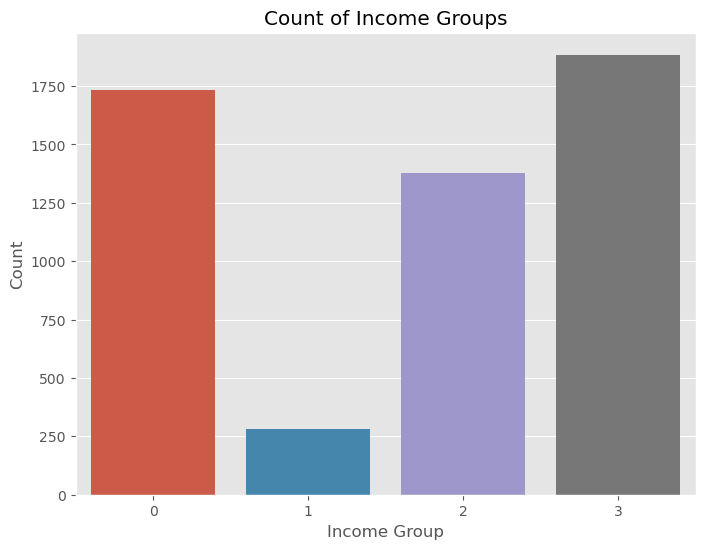

In [794]:
# Distribution plot for 'Income_group_encoded'
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='income_group_encoded')
plt.title("Count of Income Groups")
plt.xlabel("Income Group")
plt.ylabel("Count")
plt.show()

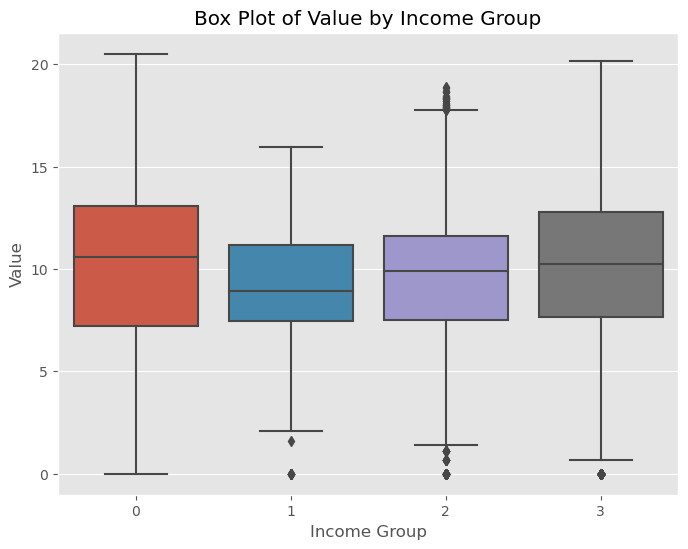

In [795]:
# Box plot for 'Value' grouped by 'Income_group_encoded'
plt.figure(figsize=(8, 6))
sns.boxplot(x='income_group_encoded', y='value', data=df1)
plt.title("Box Plot of Value by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Value")
plt.show()

#### - Save cleaned dataset

In [796]:
# Reset the index and ensure that the previous index has been not kept
df1.reset_index(drop=True, inplace=True)

# Save updated dataset and indicate index as False since we do not want to include index columns
df1.to_csv('Dataset/WorldMiningDataset/Dataset1_WorldMining_cleaned.csv', index=False)

#### - Analyze the Statistics and Visualization

In [797]:
# Stats summary of our cleaned data
df1.describe()

,year,value,income_group_encoded,groupscommodity_encoded,region_encoded,politicsest_encoded
count,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000
mean,19.009477,9.829656,1.647081,2.080743,2.287149,0.593063
std,1.412706,4.295972,1.264826,1.383149,2.054332,0.491310
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,7.484228,0.000000,1.000000,1.000000,0.000000
50%,19.000000,10.203537,2.000000,2.000000,2.000000,1.000000
75%,20.000000,12.605962,3.000000,3.000000,4.000000,1.000000
max,21.000000,20.512541,3.000000,4.000000,6.000000,1.000000


In [798]:
# Correlation
df1.corr()

,year,value,income_group_encoded,groupscommodity_encoded,region_encoded,politicsest_encoded
year,1.000000,-0.026335,0.001236,0.000190,0.003831,0.000095
value,-0.026335,1.000000,-0.017569,-0.132847,-0.039515,0.002586
income_group_encoded,0.001236,-0.017569,1.000000,-0.030629,0.019237,0.654755
groupscommodity_encoded,0.000190,-0.132847,-0.030629,1.000000,0.015323,-0.036446
region_encoded,0.003831,-0.039515,0.019237,0.015323,1.000000,0.231871
politicsest_encoded,0.000095,0.002586,0.654755,-0.036446,0.231871,1.000000


C:\Users\hp\AppData\Local\Temp\ipykernel_16780\3667810284.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.value, fit=norm)


<Axes: xlabel='value', ylabel='Density'>

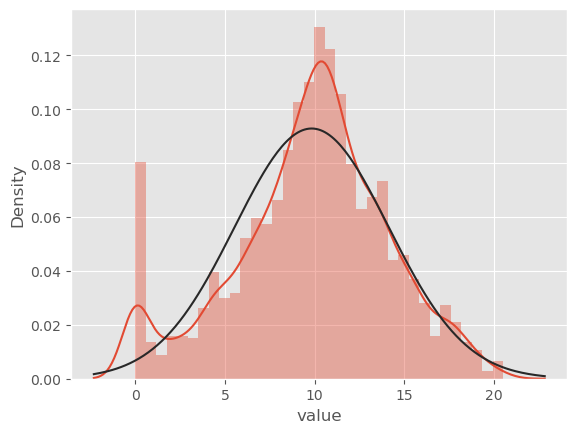

In [799]:
# Distribution plot for value
sns.distplot(df1.value, fit=norm)

In [800]:
# Find records where value is less than 3.5 then drop related records for better distribution
filtered_value = df1[df1.value < 3.5].index
print(filtered_value)
df1.drop(filtered_value, inplace=True)

Int64Index([   5,    6,    7,   27,   28,   29,   77,   78,   79,   96,
            ...
            5208, 5209, 5210, 5211, 5212, 5213, 5214, 5215, 5216, 5257],
           dtype='int64', length=463)


C:\Users\hp\AppData\Local\Temp\ipykernel_16780\2627548173.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.value, fit=norm)


<Axes: xlabel='value', ylabel='Density'>

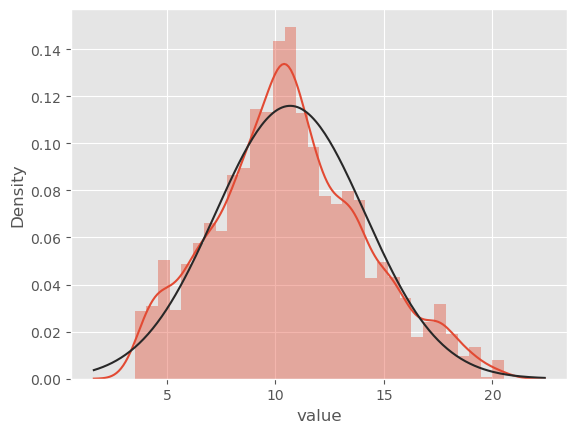

In [801]:
# List plot again after cut some values
# Now we have better normal distribution
sns.distplot(df1.value, fit=norm)

#### - Correlation seems so week with independent variables so regression may not be a good idea

In [802]:
# To compare value 
df1.corr()['value'].abs().sort_values(ascending = False)

value                      1.000000
groupscommodity_encoded    0.139867
region_encoded             0.036549
politicsest_encoded        0.007009
year                       0.002396
income_group_encoded       0.000996
Name: value, dtype: float64

#### - Create a grid search with cross validation (GridSearchCV) of SVM

In [803]:
# Apply test and train dataset and select X as Politic column
y = df1.politicsest_encoded
X = df1.drop("politicsest_encoded", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,train_size=0.5)

# First I apply Scaler for all dataset in Pipeline for next code cells  

In [804]:
# GridSearchCV via using pipeline to apply estimator and SVC for Classification
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('feature_selection', SelectFromModel(estimator=LogisticRegression())), 
    ('svm', SVC(random_state=42))
])

# Define parameters for grid search
grid_parameters = {
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': [1, 0.1, 0.01],
    'svm__C': [1, 10, 50]
}

# Perform grid search via cross-validation
grid_search = GridSearchCV(pipeline, grid_parameters, cv=3,n_jobs =-1,scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model performance
print("\nBest parameters :", grid_search.best_params_)
print("Best model accuracy:", grid_search.best_score_)


Best parameters : {'svm__C': 10, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Best model accuracy: 0.8898586866167912


#### - Display confusion matrix and classification report then analyze the best model

Confusion Matrix:
[[300 111]
 [  4 548]]

Confusion Matrix HeatMap:


<Axes: xlabel='Predicted', ylabel='Actual'>

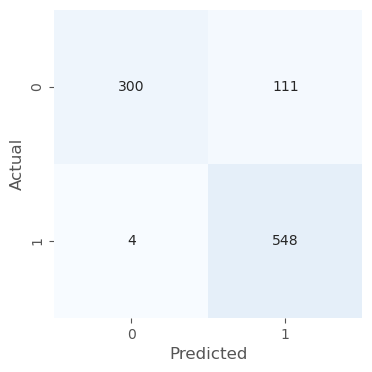

In [805]:
# Get best model
best_model = grid_search.best_estimator_

# Predictions on the test data
y_pred = best_model.predict(X_test)

# Confusion matrix and classification report
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nConfusion Matrix HeatMap:")
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.heatmap(df_cm, annot=True, cbar=False, square=True, cmap="Blues",vmax = 6000,fmt="d")

In [806]:
# Classification report and precision/recall
print("\nClassification Report:")
print(classification_report(y_test, y_pred,target_names=['class 0', 'class 1']))


Classification Report:
              precision    recall  f1-score   support

     class 0       0.99      0.73      0.84       411
     class 1       0.83      0.99      0.91       552

    accuracy                           0.88       963
   macro avg       0.91      0.86      0.87       963
weighted avg       0.90      0.88      0.88       963



#### Findings about Classification model: 

- A high precision means that when the model predicts an instance as positive (class 1), it is correct 83% of the time. Similarly, when it predicts an instance as negative (class 0), it is correct 99% of the time.

- A high recall indicates that the model can identify most of the positive instances. In this case, the model correctly identifies 99% of the actual positive instances (class 1), while it only captures 73% of the actual negative instances (class 0)

- The accuracy of the model is calculated as the percentage of correctly predicted instances out of the total instances. In this report, the accuracy is 0.88, meaning that the model correctly predicts 88% of the instances in the dataset.

- So it seems that we are able to predict Politic situation of countries with independent variables like incomeLevel, region, material type and volume of commodities.

In [807]:
# Apply again best model
model_svm_linear = SVC(kernel='rbf', C=10, gamma=1)
model_svm_linear.fit(X_train, y_train)

SVC(C=10, gamma=1)

In [808]:
# List again accuracy for best model
y_pred = model_svm_linear.predict(X_test)
print('Accuracy of SVC classifier on test set: {:.2f}'.format(model_svm_linear.score(X_test, y_test)))

Accuracy of SVC classifier on test set: 0.86


### - Out of Sample Prediction

In [809]:
# Create random Dataset for Out of Sample Prediction - Classification model
import random

# Generate empty DataFrame
percentiles_list = []

# Number of random samples
num_samples = 50

# Calculate random samples
for _ in range(num_samples):
    random_sample = df1.sample(n=50, random_state=random.randint(1, 10000))
    percentiles = random_sample.describe().loc[['25%', '50%'], :]
    percentiles_list.append(percentiles)

# Concatenate all samples into a DataFrame
synthetic2 = pd.concat(percentiles_list)

# Convert integers
synthetic2 = synthetic2.astype("int")

# Reset the index
synthetic2.reset_index(drop=True, inplace=True)

# Display
synthetic2.head()

,year,value,income_group_encoded,groupscommodity_encoded,region_encoded,politicsest_encoded
0,18,9,0,0,1,0
1,19,11,2,2,2,1
2,18,7,0,1,1,0
3,19,10,1,2,2,1
4,18,8,1,2,1,0


In [810]:
# Apply test and train dataset and select X as Politic column
y1 = synthetic2.politicsest_encoded
X1 = synthetic2.drop("politicsest_encoded", axis=1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42,train_size=0.5)

# First I apply Scaler for all dataset in Pipeline for next code cells 
# GridSearchCV via using pipeline to apply estimator and SVC for Classification
pipeline1 = Pipeline([
    ('scaler', StandardScaler()), 
    ('feature_selection', SelectFromModel(estimator=LogisticRegression())), 
    ('svm', SVC(random_state=42))
])

# Define parameters for grid search
grid_parameters1 = {
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': [1, 0.1, 0.01],
    'svm__C': [1, 10, 50]
}

# Perform grid search via cross-validation
grid_search = GridSearchCV(pipeline1, grid_parameters1, cv=3,n_jobs =-1,scoring='accuracy')
grid_search.fit(X_train1, y_train1)

# Best model performance
print("\nBest parameters :", grid_search.best_params_)
print("Best model accuracy:", grid_search.best_score_)

# Get best model
best_model1 = grid_search.best_estimator_

# Predictions on the test data
y_pred1 = best_model.predict(X_test1)

# Classification report and precision/recall
print("\nClassification Report:")
print(classification_report(y_test1, y_pred1,target_names=['class 0', 'class 1']))


Best parameters : {'svm__C': 1, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Best model accuracy: 0.9411764705882352

Classification Report:
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        12
     class 1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



- It seems our model performs well with newly generated Dataframe

## Dataset 2 (VanPetroDatabase) - Regression 

Dataset from their database("VanPetroDatabase.xlsx"). Since they know I am going to submit it to college, they manipulated the data and if they like what I am trying to do, they will let me to do analysis with their real data in future

Info about dataset and features :

- OperationID: Unique identifier for each order.

- Quantity: Quantity of material.

- TotalWeight: Total weight of the material.

- OrderCompleteHour: Total hour duration at which the order was completed.

- Invoice_number: Invoice number associated with the order.

- Profit: Profit earned from operation.

- Price: Price for service given to customers.

- Rating: Rating given by customer about their satisfactory level.

- Customer.companyName: Name of the customer's company.

- Customer.Country: Country where the customer is located.

- Service.Service: Name of the mining service.

- DelayIssues.DelayType: Type of delay issue.

- Order.Material/RockType: Type of material or rock extracted in the order.

- Order.SubmissionDate: Date of order submission.

- Order.CompletionDate: Date of order completion.

#### - Load the python library and read the data

In [811]:
# Import csv file
df2 = pd.read_excel('Dataset/VanPetroDatabase/VanPetroDatabase.xlsx')

# Display the first few rows of dataset
df2.head()

,OperationID,Quantity,TotalWeight,OrderCompleteHour,Invoice_number,Profit,Price,Rating,Customer.customerId,Customer.customerFirstName,...,DelayIssues.DelayCode,Order.OrderID,Order.SampleDescription,Order.Material/RockType,Order.Dimension,Order.BillToName,Order.AdditionalNotes,Order.SubmissionDate,Order.CompletionDate,Date.dateID
0,12110,967.365029,175.177530,15,34-509-3252,570.215949,346.711683,39,1177,Sharlene,...,E1,5199,Mumps polyneuropathy,Stone,L,Submitter,massa donec dapibus duis at velit eu est congu...,5/25/2022,5/29/2021,760083
1,12111,1021.961668,943.410718,15,76-138-9784,1185.446687,629.915833,81,1168,De,...,E1,5359,"Chronic follicular conjunctivitis, unspecified...",Stone,L,Other,integer pede justo lacinia eget tincidunt eget...,6/29/2021,8/17/2022,3096705
2,12112,930.546229,206.218280,16,00-977-7977,640.867307,366.984599,6,632,Oneida,...,D2,5930,Malignant neoplasm of unspecified lower limb,Vinyl,M,Submitter,mi in porttitor pede justo eu massa donec dapi...,2/17/2020,8/13/2022,4147606
3,12113,438.003264,226.818788,16,17-883-4885,537.067063,193.082393,77,1204,Curtis,...,A1,4768,"Pnctr w/o fb of abd wall, unsp q w penet perit...",Vinyl,S,Other,aenean lectus pellentesque eget nunc donec qui...,5/26/2018,8/5/2018,9323996
4,12114,1314.685204,876.399452,17,48-392-9823,1283.664443,615.276196,40,963,Marco,...,U3,5812,Other female genital mutilation status,Glass,3XL,Submitter,sem duis aliquam convallis nunc proin at turpi...,7/14/2019,4/9/2018,2875259


In [812]:
# Display the column information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   OperationID                 1000 non-null   int64  
 1   Quantity                    1000 non-null   float64
 2   TotalWeight                 1000 non-null   float64
 3   OrderCompleteHour           1000 non-null   int64  
 4   Invoice_number              1000 non-null   object 
 5   Profit                      1000 non-null   float64
 6   Price                       1000 non-null   float64
 7   Rating                      1000 non-null   int64  
 8   Customer.customerId         1000 non-null   int64  
 9   Customer.customerFirstName  1000 non-null   object 
 10  Customer.customerLastName   1000 non-null   object 
 11  Customer.companyName        1000 non-null   object 
 12  Customer.email              1000 non-null   object 
 13  Customer.IsBigAccount       1000 n

In [813]:
# First we need to see how many null values we have as per column
df2.isnull().sum()

OperationID                     0
Quantity                        0
TotalWeight                     0
OrderCompleteHour               0
Invoice_number                  0
Profit                          0
Price                           0
Rating                          0
Customer.customerId             0
Customer.customerFirstName      0
Customer.customerLastName       0
Customer.companyName            0
Customer.email                  0
Customer.IsBigAccount           0
Customer.Adress                 0
Customer.City                   0
Customer.State                  0
Customer.Country                0
Service.ServiceID               0
Service.Service                 0
Service.ServiceType             0
DelayIssues.delayID             0
DelayIssues.DelayType         708
DelayIssues.DelayCode           0
Order.OrderID                   0
Order.SampleDescription         0
Order.Material/RockType         0
Order.Dimension                 0
Order.BillToName                0
Order.Addition

In [814]:
# As per df.(info) we have total 708 rows null value for DelayIssues.DelayType.
df2.drop(["DelayIssues.DelayType"],axis = 1, inplace= True)

In [815]:
# List dataset info again
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   OperationID                 1000 non-null   int64  
 1   Quantity                    1000 non-null   float64
 2   TotalWeight                 1000 non-null   float64
 3   OrderCompleteHour           1000 non-null   int64  
 4   Invoice_number              1000 non-null   object 
 5   Profit                      1000 non-null   float64
 6   Price                       1000 non-null   float64
 7   Rating                      1000 non-null   int64  
 8   Customer.customerId         1000 non-null   int64  
 9   Customer.customerFirstName  1000 non-null   object 
 10  Customer.customerLastName   1000 non-null   object 
 11  Customer.companyName        1000 non-null   object 
 12  Customer.email              1000 non-null   object 
 13  Customer.IsBigAccount       1000 n

#### - Data Preparation

In [816]:
# Update Date columns as last 2 digits of year value
df2["Order.SubmissionDate"] = df2["Order.SubmissionDate"].astype(str).str[-2:]
df2["Order.CompletionDate"] = df2["Order.CompletionDate"].astype(str).str[-2:]

df2["Order.SubmissionDate"] = df2["Order.SubmissionDate"].astype("int")
df2["Order.CompletionDate"] = df2["Order.CompletionDate"].astype("int")

In [817]:
# Change dot with underscore
#df.columns.str.replace(".","_")
df2.rename(columns=lambda x: x.replace(".", "_"), inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   OperationID                 1000 non-null   int64  
 1   Quantity                    1000 non-null   float64
 2   TotalWeight                 1000 non-null   float64
 3   OrderCompleteHour           1000 non-null   int64  
 4   Invoice_number              1000 non-null   object 
 5   Profit                      1000 non-null   float64
 6   Price                       1000 non-null   float64
 7   Rating                      1000 non-null   int64  
 8   Customer_customerId         1000 non-null   int64  
 9   Customer_customerFirstName  1000 non-null   object 
 10  Customer_customerLastName   1000 non-null   object 
 11  Customer_companyName        1000 non-null   object 
 12  Customer_email              1000 non-null   object 
 13  Customer_IsBigAccount       1000 n

In [818]:
# Transform header names into small case letters
#df2.columns.str.lower()
df2.rename(columns=lambda x: x.lower(), inplace=True)

# Change bool dataType as 0 and 1 - customer_isbigaccount
df2.customer_isbigaccount = df2.customer_isbigaccount.astype("int")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operationid                 1000 non-null   int64  
 1   quantity                    1000 non-null   float64
 2   totalweight                 1000 non-null   float64
 3   ordercompletehour           1000 non-null   int64  
 4   invoice_number              1000 non-null   object 
 5   profit                      1000 non-null   float64
 6   price                       1000 non-null   float64
 7   rating                      1000 non-null   int64  
 8   customer_customerid         1000 non-null   int64  
 9   customer_customerfirstname  1000 non-null   object 
 10  customer_customerlastname   1000 non-null   object 
 11  customer_companyname        1000 non-null   object 
 12  customer_email              1000 non-null   object 
 13  customer_isbigaccount       1000 n

In [819]:
# Check unique values for company name
df2.customer_companyname.value_counts()

Teck Resources Limited         166
Taseko Mines Limited           133
Kirkland Lake Gold Ltd.         99
Cameco Corporation              52
Kinross Gold Corporation        48
Yamana Gold Inc.                41
Osisko Gold Royalties Ltd.      39
Detour Gold Corporation         39
Franco-Nevada Corporation       39
Lundin Mining Corporation       38
Agnico Eagle Mines Limited      33
New Gold Inc.                   33
Barrick Gold Corporation        32
Eldorado Gold Corporation       32
Goldcorp Inc.                   32
First Quantum Minerals Ltd.     31
Nutrien Ltd.                    30
SSR Mining Inc.                 30
Pan American Silver Corp.       29
Vale Canada Limited             24
Name: customer_companyname, dtype: int64

In [820]:
# Assign companies
companies = ["Osisko Gold Royalties Ltd.", "Detour Gold Corporation", 
              "Franco-Nevada Corporation", "Lundin Mining Corporation", "Agnico Eagle Mines Limited", 
              "New Gold Inc.", "Barrick Gold Corporation", "Eldorado Gold Corporation", "Goldcorp Inc.", 
              "First Quantum Minerals Ltd.", "Nutrien Ltd.", "SSR Mining Inc.", "Pan American Silver Corp.", 
              "Vale Canada Limited"]

# Replace matching categories with 'Others'
df2.loc[df2['customer_companyname'].str.contains('|'.join(companies), case=False), 'customer_companyname'] = 'Others'

# Print the updated DataFrame
df2.customer_companyname.value_counts()

Others                      461
Teck Resources Limited      166
Taseko Mines Limited        133
Kirkland Lake Gold Ltd.      99
Cameco Corporation           52
Kinross Gold Corporation     48
Yamana Gold Inc.             41
Name: customer_companyname, dtype: int64

<Axes: >

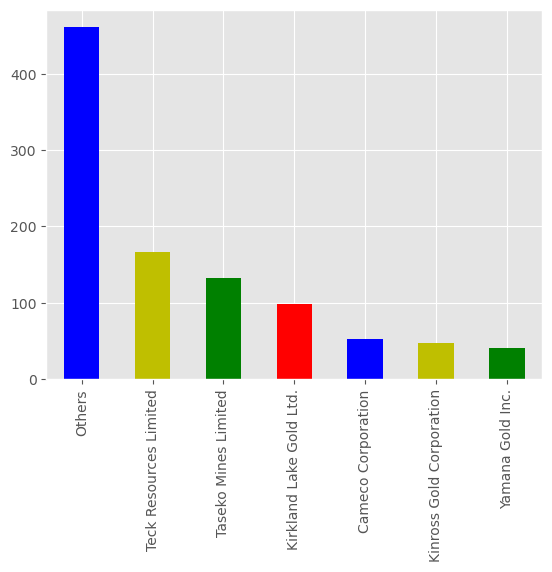

In [821]:
# Check unique values for customer_companyname columns
df2.customer_companyname.value_counts().plot(kind='bar', color=list('bygr'))

In [822]:
# Drop unnecessary columns
df2.drop(["operationid","customer_customerid","customer_customerfirstname","customer_customerlastname",
         "customer_email","customer_adress","customer_city","customer_state","customer_country","service_serviceid",
         "service_service","delayissues_delayid","delayissues_delaycode","order_orderid","order_sampledescription",
         "order_dimension","order_billtoname","order_additionalnotes","date_dateid","invoice_number"],
         axis = 1 , inplace= True)

In [823]:
# Reset the index and ensure that the previous index has been not kept
df2.reset_index(drop=True, inplace=True)

In [824]:
# Rename columns with more simple names
df2.rename(columns={'customer_companyname':'companyname'}, inplace=True)
df2.rename(columns={'service_servicetype':'servicetype'}, inplace=True)
df2.rename(columns={'order_material/rocktype':'materialtype'}, inplace=True)

#### - Create dummy values

In [825]:
# Assign columns that you want to create dummy variables for object dtypes
dummy_columns = ["companyname","servicetype","materialtype"]
dummy_features = pd.get_dummies(df2[dummy_columns], drop_first=True)

# Drop previous columns and combine original dataset with dummy one
df2.drop(df2[dummy_columns],axis=1,inplace=True)
df3 = pd.concat([df2, dummy_features], axis=1)

#### - Save cleaned dataset

In [826]:
# List last version of dataset
df3.info()
# Save updated dataset and indicate index as False since we do not want to include index columns
df3.to_csv('Dataset/VanPetroDatabase/Dataset2_VanPetroDatabase_cleaned.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   quantity                              1000 non-null   float64
 1   totalweight                           1000 non-null   float64
 2   ordercompletehour                     1000 non-null   int64  
 3   profit                                1000 non-null   float64
 4   price                                 1000 non-null   float64
 5   rating                                1000 non-null   int64  
 6   customer_isbigaccount                 1000 non-null   int32  
 7   order_submissiondate                  1000 non-null   int32  
 8   order_completiondate                  1000 non-null   int32  
 9   companyname_Kinross Gold Corporation  1000 non-null   uint8  
 10  companyname_Kirkland Lake Gold Ltd.   1000 non-null   uint8  
 11  companyname_Others

#### - Analyze the Statistics and Visualization

<Figure size 1200x800 with 0 Axes>

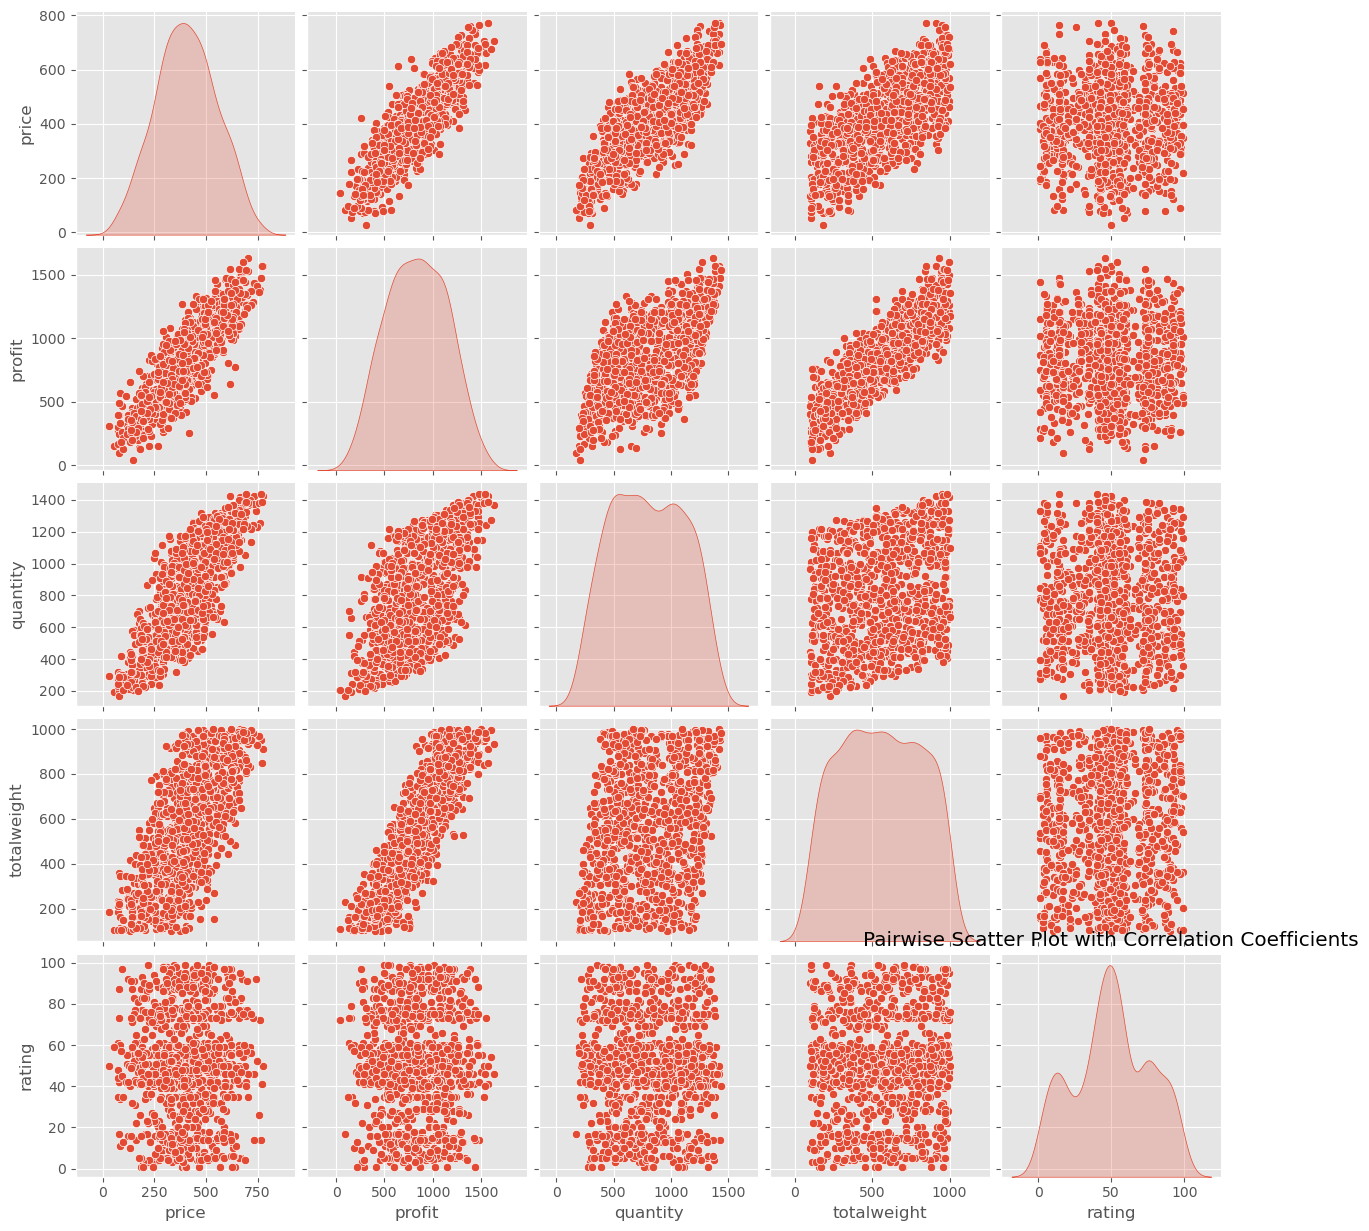

In [827]:
# Pairwise scatter plot with correlation coefficients:
plt.figure(figsize=(12, 8))
sns.pairplot(df3, vars=['price', 'profit', 'quantity', 'totalweight', 'rating'], kind='scatter', diag_kind='kde')
plt.title("Pairwise Scatter Plot with Correlation Coefficients")
plt.show()

In [828]:
# Stats summary of our cleaned data
df3.describe()

,quantity,totalweight,ordercompletehour,profit,price,rating,customer_isbigaccount,order_submissiondate,order_completiondate,companyname_Kinross Gold Corporation,...,materialtype_Brass,materialtype_Glass,materialtype_Granite,materialtype_Plastic,materialtype_Plexiglass,materialtype_Rubber,materialtype_Steel,materialtype_Stone,materialtype_Vinyl,materialtype_Wood
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,802.273106,554.051831,60.560000,834.943348,404.612536,50.200000,0.52000,19.895000,19.750000,0.048000,...,0.092000,0.077000,0.092000,0.089000,0.105000,0.077000,0.094000,0.066000,0.098000,0.092000
std,316.370999,257.859333,26.212086,315.262670,146.490589,25.771771,0.49985,1.840479,1.849032,0.213873,...,0.289171,0.266725,0.289171,0.284886,0.306707,0.266725,0.291975,0.248406,0.297463,0.289171
min,171.157542,100.066329,15.000000,41.434240,29.155419,1.000000,0.00000,17.000000,17.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,536.704454,341.730421,41.500000,595.604417,301.867109,34.750000,0.00000,18.000000,18.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,793.264514,552.385428,61.500000,837.771682,401.988190,50.000000,1.00000,20.000000,20.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1066.529665,773.890248,78.000000,1079.536367,508.360710,73.000000,1.00000,21.000000,21.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1439.657389,999.967617,137.000000,1632.611281,774.080348,99.000000,1.00000,23.000000,23.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [829]:
# Covariance
df3.cov()

,quantity,totalweight,ordercompletehour,profit,price,rating,customer_isbigaccount,order_submissiondate,order_completiondate,companyname_Kinross Gold Corporation,...,materialtype_Brass,materialtype_Glass,materialtype_Granite,materialtype_Plastic,materialtype_Plexiglass,materialtype_Rubber,materialtype_Steel,materialtype_Stone,materialtype_Vinyl,materialtype_Wood
quantity,100090.608880,21715.136500,-510.019712,61005.917294,37314.252223,76.696508,-2.086978,-21.210534,-0.552363,-0.941954,...,2.751280,-0.691278,-1.120323,-2.315108,-0.871484,2.659784,0.437016,-1.643146,1.904948,-1.825084
totalweight,21715.136500,66491.435722,-6.982305,70299.658647,25970.936073,317.415825,3.358388,17.158293,11.800571,0.420025,...,1.420599,-1.313090,-0.641119,0.241333,1.037819,2.055104,-2.591289,-0.849222,1.815302,-1.164323
ordercompletehour,-510.019712,-6.982305,687.073473,-151.117672,-131.381521,6.689690,-0.040240,-0.716917,-1.167167,0.115235,...,0.352833,-0.144264,-0.174695,0.179339,-0.484284,0.090971,-0.315956,-0.113073,-0.185065,0.369850
profit,61005.917294,70299.658647,-151.117672,99390.551178,39640.369557,155.686203,0.776200,14.555885,8.083399,-0.070550,...,1.540653,-2.477552,-1.722723,-1.293360,1.547831,3.279235,-0.935411,-0.272378,1.654949,-2.543949
price,37314.252223,25970.936073,-131.381521,39640.369557,21459.492633,88.565518,-0.353058,2.730699,0.759573,-0.367218,...,1.557341,-0.549787,-0.319287,-0.176918,-0.159721,1.686953,-1.069531,-1.281277,1.508723,-1.485636
rating,76.696508,317.415825,6.689690,155.686203,88.565518,664.184184,-0.362362,0.568569,-0.810811,0.019419,...,0.376977,-0.227628,0.102703,0.217417,-0.368368,-0.101502,-0.066867,-0.339540,0.244645,0.238839
customer_isbigaccount,-2.086978,3.358388,-0.040240,0.776200,-0.353058,-0.362362,0.249850,-0.027427,-0.021021,-0.001962,...,0.002162,-0.011051,0.004164,-0.003283,0.003403,0.002963,0.003123,-0.006326,0.007047,-0.002843
order_submissiondate,-21.210534,17.158293,-0.716917,14.555885,2.730699,0.568569,-0.027427,3.387362,-0.164414,-0.023984,...,-0.019359,0.025110,-0.018358,-0.005661,-0.013989,-0.018934,0.005876,-0.004074,0.022312,0.044705
order_completiondate,-0.552363,11.800571,-1.167167,8.083399,0.759573,-0.810811,-0.021021,-0.164414,3.418919,0.009009,...,-0.015015,-0.000751,-0.015015,-0.032783,0.014264,0.021271,-0.033534,0.016517,0.020521,0.021021
companyname_Kinross Gold Corporation,-0.941954,0.420025,0.115235,-0.070550,-0.367218,0.019419,-0.001962,-0.023984,0.009009,0.045742,...,-0.000416,-0.001698,-0.003419,0.004733,-0.002042,0.000304,0.001489,0.001834,-0.003708,0.004589


In [830]:
# Correlation
df3.corr()

,quantity,totalweight,ordercompletehour,profit,price,rating,customer_isbigaccount,order_submissiondate,order_completiondate,companyname_Kinross Gold Corporation,...,materialtype_Brass,materialtype_Glass,materialtype_Granite,materialtype_Plastic,materialtype_Plexiglass,materialtype_Rubber,materialtype_Steel,materialtype_Stone,materialtype_Vinyl,materialtype_Wood
quantity,1.000000,0.266185,-0.061502,0.611650,0.805134,0.009407,-0.013197,-0.036427,-0.000944,-0.013921,...,0.030074,-0.008192,-0.012246,-0.025686,-0.008981,0.031520,0.004731,-0.020908,0.020242,-0.019950
totalweight,0.266185,1.000000,-0.001033,0.864764,0.687535,0.047764,0.026056,0.036154,0.024750,0.007616,...,0.019052,-0.019092,-0.008598,0.003285,0.013122,0.029880,-0.034418,-0.013258,0.023666,-0.015615
ordercompletehour,-0.061502,-0.001033,1.000000,-0.018287,-0.034216,0.009903,-0.003071,-0.014861,-0.024082,0.020555,...,0.046549,-0.020634,-0.023048,0.024016,-0.060239,0.013012,-0.041284,-0.017366,-0.023735,0.048794
profit,0.611650,0.864764,-0.018287,1.000000,0.858332,0.019162,0.004926,0.025086,0.013867,-0.001046,...,0.016900,-0.029464,-0.018897,-0.014400,0.016008,0.038997,-0.010162,-0.003478,0.017647,-0.027905
price,0.805134,0.687535,-0.034216,0.858332,1.000000,0.023459,-0.004822,0.010128,0.002804,-0.011721,...,0.036764,-0.014071,-0.007537,-0.004239,-0.003555,0.043175,-0.025006,-0.035210,0.034623,-0.035071
rating,0.009407,0.047764,0.009903,0.019162,0.023459,1.000000,-0.028129,0.011987,-0.017015,0.003523,...,0.050584,-0.033114,0.013781,0.029613,-0.046603,-0.014766,-0.008886,-0.053038,0.031912,0.032048
customer_isbigaccount,-0.013197,0.026056,-0.003071,0.004926,-0.004822,-0.028129,1.000000,-0.029814,-0.022744,-0.018352,...,0.014959,-0.082890,0.028809,-0.023057,0.022200,0.022224,0.021400,-0.050951,0.047395,-0.019668
order_submissiondate,-0.036427,0.036154,-0.014861,0.025086,0.010128,0.011987,-0.029814,1.000000,-0.048313,-0.060930,...,-0.036375,0.051151,-0.034494,-0.010796,-0.024782,-0.038570,0.010934,-0.008911,0.040755,0.083998
order_completiondate,-0.000944,0.024750,-0.024082,0.013867,0.002804,-0.017015,-0.022744,-0.048313,1.000000,0.022781,...,-0.028082,-0.001522,-0.028082,-0.062234,0.025153,0.043131,-0.062114,0.035959,0.037309,0.039315
companyname_Kinross Gold Corporation,-0.013921,0.007616,0.020555,-0.001046,-0.011721,0.003523,-0.018352,-0.060930,0.022781,1.000000,...,-0.006733,-0.029761,-0.055289,0.077676,-0.031130,0.005334,0.023853,0.034518,-0.058279,0.074194


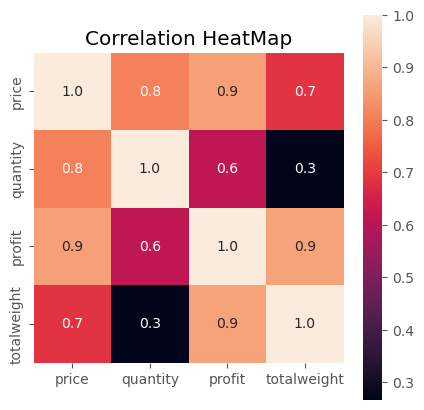

In [831]:
# Select the desired columns
selected_columns = ['price', 'quantity', 'profit','totalweight']

# Create a correlation matrix for the selected columns
correlation_matrix = df3[selected_columns].corr()

# Create the heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True, fmt='.1f', annot_kws={'size': 10})
plt.title("Correlation HeatMap")

# Display the heatmap
plt.show()

In [832]:
# Absolute value of correlation for price in descending order
df3.corr()["price"].abs().sort_values(ascending = False)

price                                   1.000000
profit                                  0.858332
quantity                                0.805134
totalweight                             0.687535
companyname_Kirkland Lake Gold Ltd.     0.059214
servicetype_COVERED THIN                0.057196
companyname_Taseko Mines Limited        0.046650
materialtype_Rubber                     0.043175
materialtype_Brass                      0.036764
materialtype_Stone                      0.035210
materialtype_Wood                       0.035071
materialtype_Vinyl                      0.034623
ordercompletehour                       0.034216
companyname_Yamana Gold Inc.            0.030342
materialtype_Steel                      0.025006
rating                                  0.023459
companyname_Others                      0.016438
servicetype_FLUID INCLUSIONS            0.015380
materialtype_Glass                      0.014071
companyname_Teck Resources Limited      0.012991
companyname_Kinross 

In [833]:
# Absolute value of correlation for price in descending order
df3.corr()["profit"].abs().sort_values(ascending = False)

profit                                  1.000000
totalweight                             0.864764
price                                   0.858332
quantity                                0.611650
companyname_Kirkland Lake Gold Ltd.     0.062742
servicetype_COVERED THIN                0.057165
companyname_Taseko Mines Limited        0.054200
materialtype_Rubber                     0.038997
servicetype_FLUID INCLUSIONS            0.037138
materialtype_Glass                      0.029464
materialtype_Wood                       0.027905
order_submissiondate                    0.025086
companyname_Yamana Gold Inc.            0.023649
rating                                  0.019162
materialtype_Granite                    0.018897
ordercompletehour                       0.018287
materialtype_Vinyl                      0.017647
materialtype_Brass                      0.016900
materialtype_Plexiglass                 0.016008
materialtype_Plastic                    0.014400
order_completiondate

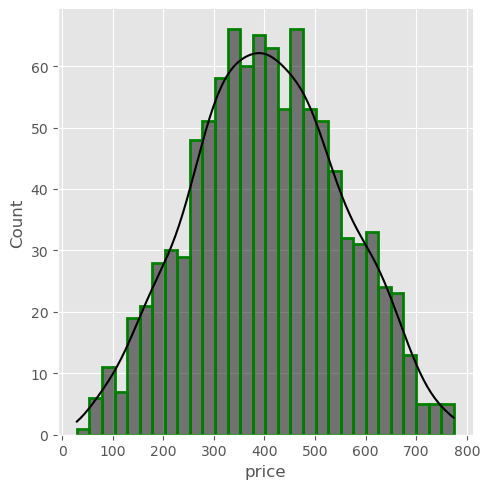

In [834]:
# Distribution plot for price and it shows very good distribution
sns.displot(df3.price, color='black',bins=30,kde=True, edgecolor='g', linewidth=2)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_16780\2364396335.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3.profit, fit=norm)


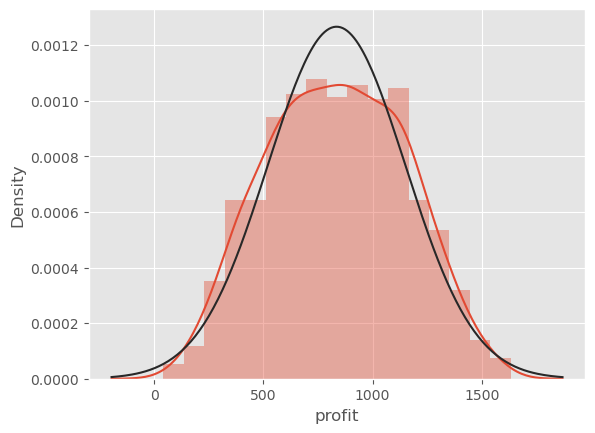

In [835]:
# Distribution plot for profit
# Also seems we have good distribution
sns.distplot(df3.profit, fit=norm)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_16780\1134588802.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3.quantity, fit=norm)


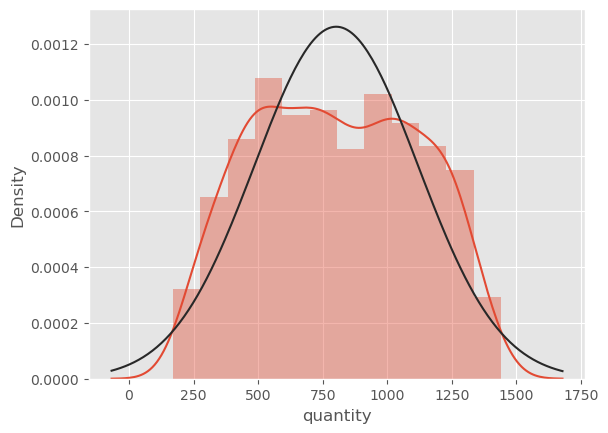

In [836]:
# Distribution plot for quantity, distb seems ok but there is little bit problem with bell shape
sns.distplot(df3.quantity, fit=norm)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_16780\2915718369.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3.price, fit=norm,ax=axes[0])
C:\Users\hp\AppData\Local\Temp\ipykernel_16780\2915718369.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3.profit, fit=norm,ax=axes[1])
C:\Users\hp

Text(0.5, 1.0, 'quantity')

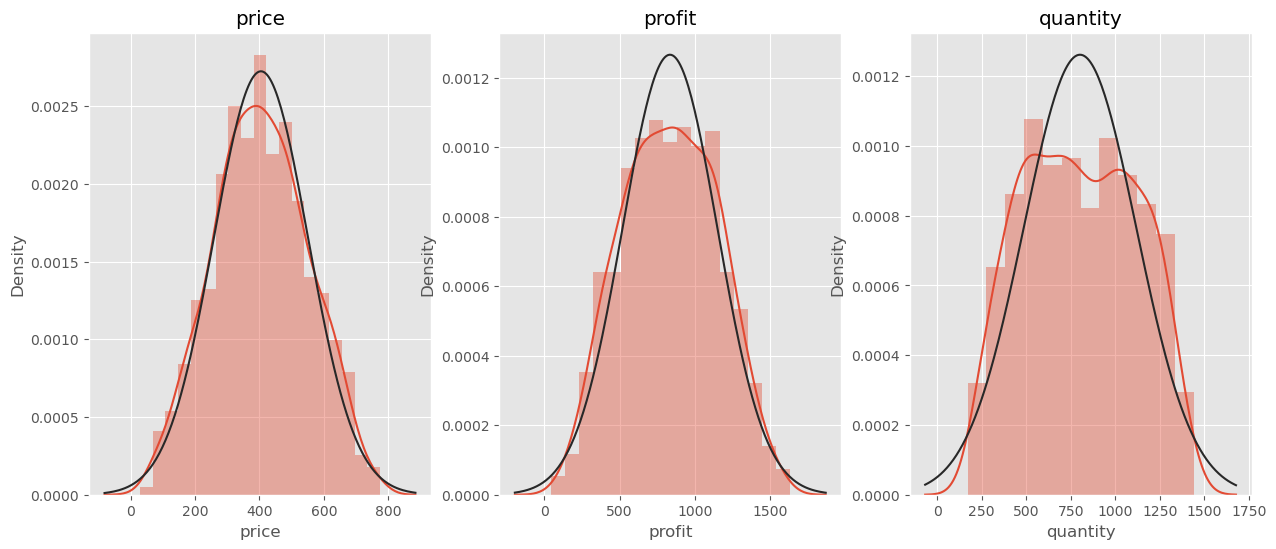

In [837]:
# Let's use plot diagrams again and display multiple plots in single place
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

# Plot 1
sns.distplot(df3.price, fit=norm,ax=axes[0])
axes[0].set_title('price')

# Plot 2
sns.distplot(df3.profit, fit=norm,ax=axes[1])
axes[1].set_title('profit')

# Plot 3
sns.distplot(df3.quantity, fit=norm,ax=axes[2])
axes[2].set_title('quantity')

* Price and Profit seems very good candidate since they are on good fit with normal distribution

#### - Multivariate analysis 

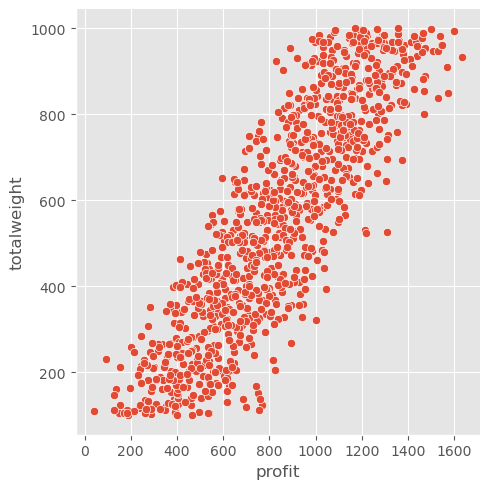

In [838]:
# Show relationship between profit against totalweight
sns.relplot(data=df3, x='profit', y='totalweight')

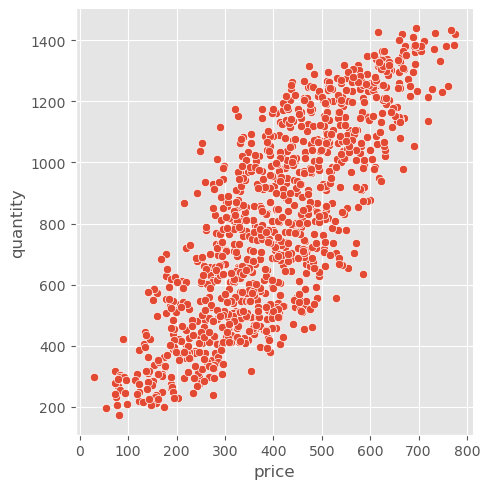

In [839]:
# Show relationship between price against quantity
sns.relplot(data=df3, x='price', y='quantity')

- Above two plots are the highest correlation each other
- Points are concentrated and form a linear
- There seems a trend so I would say that strong correlation between them

### - Feature Selection

##### Correlation Based Selection (threshold)

In [840]:
# Assign corr() value
correlation = df3.corr().abs()

# Sort the corr() by profit
correlation_target = correlation['profit'].abs().sort_values(ascending=False)
print(correlation_target)

# Select features with threshold value
selected_features = correlation_target[correlation_target > 0.5].index

# Drop profit
selected_features = selected_features.drop('profit')

# Create a new dataframe as df_correlation
df_correlation = df3[selected_features]
df_correlation.head()

profit                                  1.000000
totalweight                             0.864764
price                                   0.858332
quantity                                0.611650
companyname_Kirkland Lake Gold Ltd.     0.062742
servicetype_COVERED THIN                0.057165
companyname_Taseko Mines Limited        0.054200
materialtype_Rubber                     0.038997
servicetype_FLUID INCLUSIONS            0.037138
materialtype_Glass                      0.029464
materialtype_Wood                       0.027905
order_submissiondate                    0.025086
companyname_Yamana Gold Inc.            0.023649
rating                                  0.019162
materialtype_Granite                    0.018897
ordercompletehour                       0.018287
materialtype_Vinyl                      0.017647
materialtype_Brass                      0.016900
materialtype_Plexiglass                 0.016008
materialtype_Plastic                    0.014400
order_completiondate

,totalweight,price,quantity
0,175.177530,346.711683,967.365029
1,943.410718,629.915833,1021.961668
2,206.218280,366.984599,930.546229
3,226.818788,193.082393,438.003264
4,876.399452,615.276196,1314.685204


##### Variance Threshold Selection

In [841]:
# Drop step is applied
x = df3.drop("profit", axis=1)
    
# Apply the variance threshold method and get selected feature names
vt = VarianceThreshold(threshold=0.4)
vt.fit(x)
pd.DataFrame({'Variance': vt.variances_, 'select_status': vt.get_support()}, index=x.columns)
  
# Save it to selected features
df_variance = x.iloc[:,vt.get_support()]
df_variance

,quantity,totalweight,ordercompletehour,price,rating,order_submissiondate,order_completiondate
0,967.365029,175.177530,15,346.711683,39,22,21
1,1021.961668,943.410718,15,629.915833,81,21,22
2,930.546229,206.218280,16,366.984599,6,20,22
3,438.003264,226.818788,16,193.082393,77,18,18
4,1314.685204,876.399452,17,615.276196,40,19,18
...,...,...,...,...,...,...,...
995,939.005231,620.606393,120,414.622568,79,17,20
996,739.231350,457.400792,126,387.862193,28,21,18
997,328.047384,669.596788,126,275.755497,74,17,21
998,1066.148987,339.815149,137,386.600259,18,19,19


#####  Use SelectKBest method with k=6

In [842]:
# Use SelectKBest method with k=6
target = df3.profit
features = df3.drop('profit', axis=1)

# Select 6 features
kbest = SelectKBest(score_func=f_regression, k=6)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

kbest.fit_transform(X_train, y_train)

# Save it to df_selKBest with the selected features
df_selKBest = features.iloc[:,kbest.get_support()]
df_selKBest.head()

,quantity,totalweight,price,companyname_Kirkland Lake Gold Ltd.,servicetype_FLUID INCLUSIONS,materialtype_Wood
0,967.365029,175.177530,346.711683,0,0,0
1,1021.961668,943.410718,629.915833,1,0,0
2,930.546229,206.218280,366.984599,0,0,0
3,438.003264,226.818788,193.082393,0,0,0
4,1314.685204,876.399452,615.276196,1,1,0


In [843]:
# Function to be applied next steps to transform data
def make_poly(data):
    # polinomial degree 2
    pf = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
    fit_pf = pf.fit(data) 
    poly = pd.DataFrame(pf.transform(data), columns=fit_pf.get_feature_names_out(data.columns))
    
    return poly

### -  Regression Models with Transformation and Scaling

In [844]:
# Placeholder lists to save results
fselection_list = ["Correlation", "Correlation", "Variance", "Variance", "SelKBest", "SelKBest"]
fselection = []
ptransform = []
r2_scores = []
rmse_scores = []

In [845]:
# feature selection dataframes
selection_dataframes = [df_correlation,df_variance, df_selKBest]

# Loop - feature selection dataframes
for selection_df in selection_dataframes:
    # Loop - Polynomial transformation
    for transform_option in [True, False]:
        if transform_option:
            transformed_df = make_poly(selection_df)
            transform_label = "Poly 2 Interaction"
        else:
            transformed_df = selection_df.copy()
            transform_label = "None"

        # Split dataset into training and testing 
        X_train, X_test, y_train, y_test = train_test_split(transformed_df, target, test_size=0.25, random_state=42)

        # Feature scaling - avoid data leakage
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # fit the linear regression
        model = LinearRegression()
        model.fit(X_train_scaled, y_train)

        # Predictions on test data
        y_pred = model.predict(X_test_scaled)

        # Calculate RMSE and R2
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)

        # Store the results
        fselection.append(selection_df)
        ptransform.append(transform_label)
        r2_scores.append(r2)
        rmse_scores.append(rmse)

In [846]:
scores_table = {
    'Feature Selection': fselection_list,
    'Feature Transformation': ptransform,
    'R2': r2_scores,
    'RMSE': rmse_scores
}

# Create the dataframe
scores_t = pd.DataFrame(scores_table)
scores_t

,Feature Selection,Feature Transformation,R2,RMSE
0,Correlation,Poly 2 Interaction,0.903377,98.731281
1,Correlation,None,0.903217,98.813230
2,Variance,Poly 2 Interaction,0.901136,99.869843
3,Variance,None,0.903474,98.681968
4,SelKBest,Poly 2 Interaction,0.902605,99.125298
5,SelKBest,None,0.903535,98.650903


### - Linear Regression Model with Ridge

In [847]:
from sklearn.linear_model import Ridge
# split the model again as training and testing
feature = df3.drop("profit", axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size=0.25, random_state=42)

# series of alphas to try
alphas = 10**np.linspace(5, -2, 15)
alphas

# Ridge step
rmse_list = []
r2_list = []
model_list1 = []

# Run loop for each of the alphas to see which one is better
for a in alphas:
    ridge = Ridge(alpha=a, max_iter=1000)
    ridge.fit(X_train, Y_train)
    pred = ridge.predict(X_test)
    
    r2_list.append(ridge.score(X_train,Y_train))
    rmse = mean_squared_error(Y_test, pred)**0.5;
    rmse_list.append(rmse)
    model_list1.append(ridge)
    print("Alpha",a,"RMSE",rmse)
    
ridge_list = np.vstack((alphas, rmse_list, r2_list)).T
ridge_data = pd.DataFrame(ridge_list, columns=['Alpha', 'RMSE', "R2"])
ridge_data.tail(5)

Alpha 100000.0 RMSE 98.53442547230657
Alpha 31622.776601683792 RMSE 98.5161517921121
Alpha 10000.0 RMSE 98.53248014796335
Alpha 3162.2776601683795 RMSE 98.58903018861014
Alpha 1000.0 RMSE 98.70003894743282
Alpha 316.22776601683796 RMSE 98.92792791681207
Alpha 100.0 RMSE 99.45705805181723
Alpha 31.622776601683793 RMSE 100.34085603972227
Alpha 10.0 RMSE 101.20324908577386
Alpha 3.1622776601683795 RMSE 101.7560796299677
Alpha 1.0 RMSE 102.02663477480648
Alpha 0.31622776601683794 RMSE 102.1330684978814
Alpha 0.1 RMSE 102.16972182770505
Alpha 0.03162277660168379 RMSE 102.18165543799066
Alpha 0.01 RMSE 102.18546504429754


,Alpha,RMSE,R2
10,1.000000,102.026635,0.909135
11,0.316228,102.133068,0.909141
12,0.100000,102.169722,0.909142
13,0.031623,102.181655,0.909142
14,0.010000,102.185465,0.909142


In [848]:
# sort result and find suitable the alpha 
ridge_sorted = ridge_data.sort_values(by=['RMSE', 'R2'], ascending=[True, False]).head(1)
ridge_sorted 

,Alpha,RMSE,R2
1,31622.776602,98.516152,0.905582


### - Plot and summary analysis

#### Dependent value range is from min 40 and max 1600 so RMSE score can be considered as low

In [849]:
# Add Ridge best score to table which is created previous steps
ridge_alpha_str = "Ridge Alpha= " + str(ridge_sorted.Alpha.iloc[0])

scores_t = scores_t.append({'Feature Selection': ridge_alpha_str, 
                                   'Feature Transformation': "None", 
                                  'R2': ridge_sorted.R2.iloc[0], 
                                  'RMSE': ridge_sorted.RMSE.iloc[0]}, ignore_index=True)

# Gather together all model results into single score table as below
scores_t

C:\Users\hp\AppData\Local\Temp\ipykernel_16780\2394514483.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_t = scores_t.append({'Feature Selection': ridge_alpha_str,


,Feature Selection,Feature Transformation,R2,RMSE
0,Correlation,Poly 2 Interaction,0.903377,98.731281
1,Correlation,None,0.903217,98.813230
2,Variance,Poly 2 Interaction,0.901136,99.869843
3,Variance,None,0.903474,98.681968
4,SelKBest,Poly 2 Interaction,0.902605,99.125298
5,SelKBest,None,0.903535,98.650903
6,Ridge Alpha= 31622.776601683792,None,0.905582,98.516152


In [850]:
# Sort function to find the highest R2 and the lowest RMSE respectively
scores_t.sort_values(by=['R2', 'RMSE'], ascending=[False, True]).head(1)

,Feature Selection,Feature Transformation,R2,RMSE
6,Ridge Alpha= 31622.776601683792,None,0.905582,98.516152


#### Ridge Alpha is the best model as per table
->  Since It has the highest R2 and the lowest RMSE

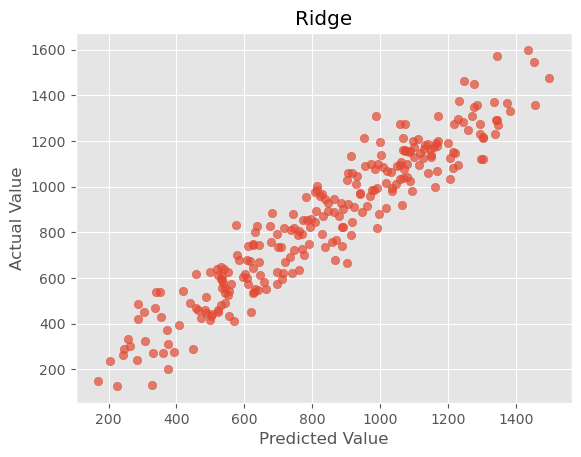

In [851]:
# Build the model so I put selected model to Features part
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size=0.25, random_state=42)

model = Ridge(alpha=a, max_iter=1000)
model.fit(X_train, Y_train)

# get the predictions for the test dataset
Y_pred = model.predict(X_test)

# plot the prediction vs actual
plt.scatter(Y_pred, Y_test, alpha=0.7)
plt.title('Ridge')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [852]:
# coefficient list for the best linear model
feat = list(X_train.columns)
coef = model.coef_.transpose()
pd.DataFrame(zip(feat,coef), columns=['Feature', 'Coefficients'])

,Feature,Coefficients
0,quantity,0.346207
1,totalweight,0.876519
2,ordercompletehour,0.133305
3,price,0.199703
4,rating,-0.180457
5,customer_isbigaccount,-1.007123
6,order_submissiondate,-0.587608
7,order_completiondate,-1.113803
8,companyname_Kinross Gold Corporation,7.266191
9,companyname_Kirkland Lake Gold Ltd.,5.200769


#### Findings about selected linear model: 

- Based on the above table, I believe the best model to be index 6: Ridge Alpha. Because It has the highest R2 and the lowest RMSE : Ridge Alpha 0.905582	98.516152 

- Dependent value range is from min 40 and max 1600 so RMSE score can be considered as low

- Our company give price to customer according to quantity but our analyze shows that profit and totalweight has higher correlation than quantity, so suggestion will be given to charge their service as per totalweight i/o quantity
 
- Coefficients: The feature "quantity" has a coefficient of 0.346207, suggesting that an increase in the quantity of the order will positively impact the target."totalweight" with a coefficient of 0.876519 indicates that higher total weight in the order contributes positively to the target."customer_isbigaccount" with a coefficient of -1.007123 suggests that big accounts have a negative impact on the target.
 
- Ridge Alpha regression scatter plot seems to have a clear trend and strong correlation between the predicted values (Y_pred) and the actual values (Y_test)

### - Out of Sample Prediction

In [853]:
# Choose two rows
synthetic = df3.describe().loc[['25%', '50%'], :]
synthetic = synthetic.astype("int")

# Poly transform
pf = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
fit_pf = pf.fit(synthetic) 

data = pf.transform(synthetic)
col = fit_pf.get_feature_names_out(synthetic.columns)

poly11 = pd.DataFrame(data, columns=col)

# StandardScaler
ss = StandardScaler()
scaled_features12 = ss.fit_transform(poly11)


scaled_df11 = pd.DataFrame(scaled_features12, columns=poly11.columns)
scaled_df11

,quantity,totalweight,ordercompletehour,profit,price,rating,customer_isbigaccount,order_submissiondate,order_completiondate,companyname_Kinross Gold Corporation,...,materialtype_Steel^2,materialtype_Steel materialtype_Stone,materialtype_Steel materialtype_Vinyl,materialtype_Steel materialtype_Wood,materialtype_Stone^2,materialtype_Stone materialtype_Vinyl,materialtype_Stone materialtype_Wood,materialtype_Vinyl^2,materialtype_Vinyl materialtype_Wood,materialtype_Wood^2
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


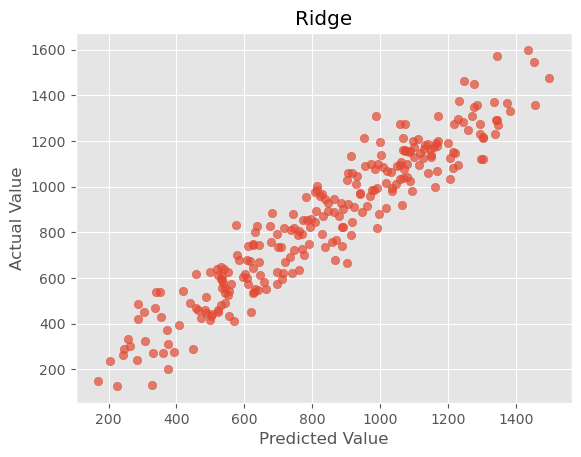

In [854]:
# Best model
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size=0.25, random_state=42)

scaled_df11 = Ridge(alpha=a, max_iter=1000)
scaled_df11.fit(X_train, Y_train)

# Make the prediction for synthetic
Y_pred = model.predict(X_test)

# plot the prediction vs actual
plt.scatter(Y_pred, Y_test, alpha=0.7)
plt.title('Ridge')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

#### As far as I observe, result does not differ with last step


## Dataset 2 (VanPetroDatabase) - Clustering

- Database("VanPetroDatabase.xlsx") will be used again for clustering
- Since dataset is already cleaned in previous analysis, I skipped preparation process and continue with modelling

In [855]:
# List again same dataset for clustering
df3.head()

,quantity,totalweight,ordercompletehour,profit,price,rating,customer_isbigaccount,order_submissiondate,order_completiondate,companyname_Kinross Gold Corporation,...,materialtype_Brass,materialtype_Glass,materialtype_Granite,materialtype_Plastic,materialtype_Plexiglass,materialtype_Rubber,materialtype_Steel,materialtype_Stone,materialtype_Vinyl,materialtype_Wood
0,967.365029,175.177530,15,570.215949,346.711683,39,1,22,21,0,...,0,0,0,0,0,0,0,1,0,0
1,1021.961668,943.410718,15,1185.446687,629.915833,81,1,21,22,0,...,0,0,0,0,0,0,0,1,0,0
2,930.546229,206.218280,16,640.867307,366.984599,6,1,20,22,0,...,0,0,0,0,0,0,0,0,1,0
3,438.003264,226.818788,16,537.067063,193.082393,77,0,18,18,0,...,0,0,0,0,0,0,0,0,1,0
4,1314.685204,876.399452,17,1283.664443,615.276196,40,0,19,18,0,...,0,1,0,0,0,0,0,0,0,0


In [856]:
#Select features for analysis
#exclude categorical variables with too many categories
#we use the following features for analysis: rating, ordercompletehour

cols = ['ordercompletehour','rating']
df_sel = df3[cols]
#df_sel = df3.drop(columns=cols)

df_sel.head()

,ordercompletehour,rating
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## K-means clustering

### Finding cluster numbers via using Elbow method

In [857]:
# First, define method for Kmeans to find optimum number of clusters
from sklearn.cluster import KMeans

def calculate_wcss(data):
    wcss = []
    for n in range(2, 15):
        kmeans = KMeans(n_clusters=n, random_state=0)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)    
    return wcss

In [858]:
wcss = calculate_wcss(df_sel)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:8

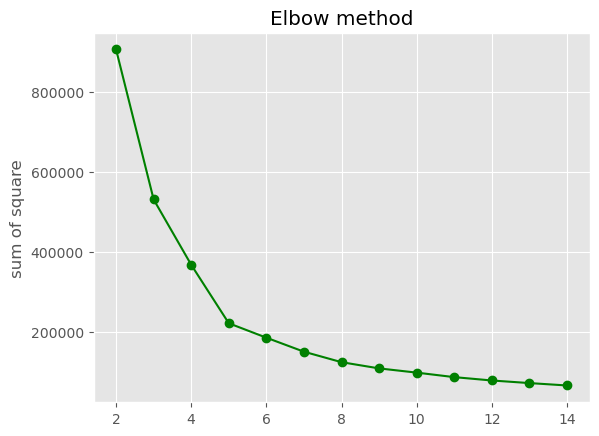

In [859]:
# Visualize elbow for optimum number of cluster
plt.plot(range(2,15), wcss, '-go')
plt.ylabel('sum of square')
plt.title("Elbow method")
plt.show()

In [860]:
# Seems like 5 or 6 from above chart but to be sure, apply KneeLocator
from kneed import KneeLocator
knee = KneeLocator(range(2,15), wcss, curve="convex", direction="decreasing")
knee.elbow

5

In [861]:
# Clusters is 5
# Generate pipeline
from sklearn.decomposition import PCA 

preprocess = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2))
])

In [862]:
# Generate clustere pipeline
from sklearn.cluster import AgglomerativeClustering, KMeans,DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
clusterer = Pipeline([
    ("Agglomerative", AgglomerativeClustering(n_clusters=5, affinity="euclidean")),
    ("KMeans", KMeans(n_clusters=5,init="k-means++")),
    #("DBSCAN", DBSCAN(eps=0.5)),
])

# I am getting error for DBscan so I had to ignore it

In [863]:
# Higher level pipeline
pipe = Pipeline([
    ("preprocess", preprocess), ("clusterer", clusterer)
])

In [864]:
# Calculate Silhouette, Calinszky Harabaz and Davies Bouldin score
# Lists to store them
cl_method = []
sh_score_list = []
ch_score_list = []
db_score_list = []
clusters = []

# loop that will calculate the scores
for name in pipe["clusterer"].named_steps:
    cl_method.append(name)
    cluster = pipe["clusterer"][name].fit_predict(df_sel)
    labels = pipe["clusterer"][name].labels_    
    sh_score_list.append(silhouette_score(df_sel, cluster))
    ch_score_list.append(calinski_harabasz_score(df_sel, cluster))
    db_score_list.append(davies_bouldin_score(df_sel, cluster))    
    clusters.append(cluster)

# result list for scores
result = pd.DataFrame(zip(cl_method, sh_score_list, ch_score_list, db_score_list), 
                      columns=["Clustering Method", "Silhoutte Score", "Callinsky Harabasz Score", "Davies Bouldin Score"])

result.sort_values(by=["Silhoutte Score", "Callinsky Harabasz Score", "Davies Bouldin Score"], 
                   ascending=[False, False, True])

# Silhouette >>> higher is better
# Calinski Harabaz >>> higher is better
# Davies Bouldin >>> lower is better

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Clustering Method,Silhoutte Score,Callinsky Harabasz Score,Davies Bouldin Score
1,KMeans,0.563102,1262.165120,0.572563
0,Agglomerative,0.561924,1240.287548,0.578221


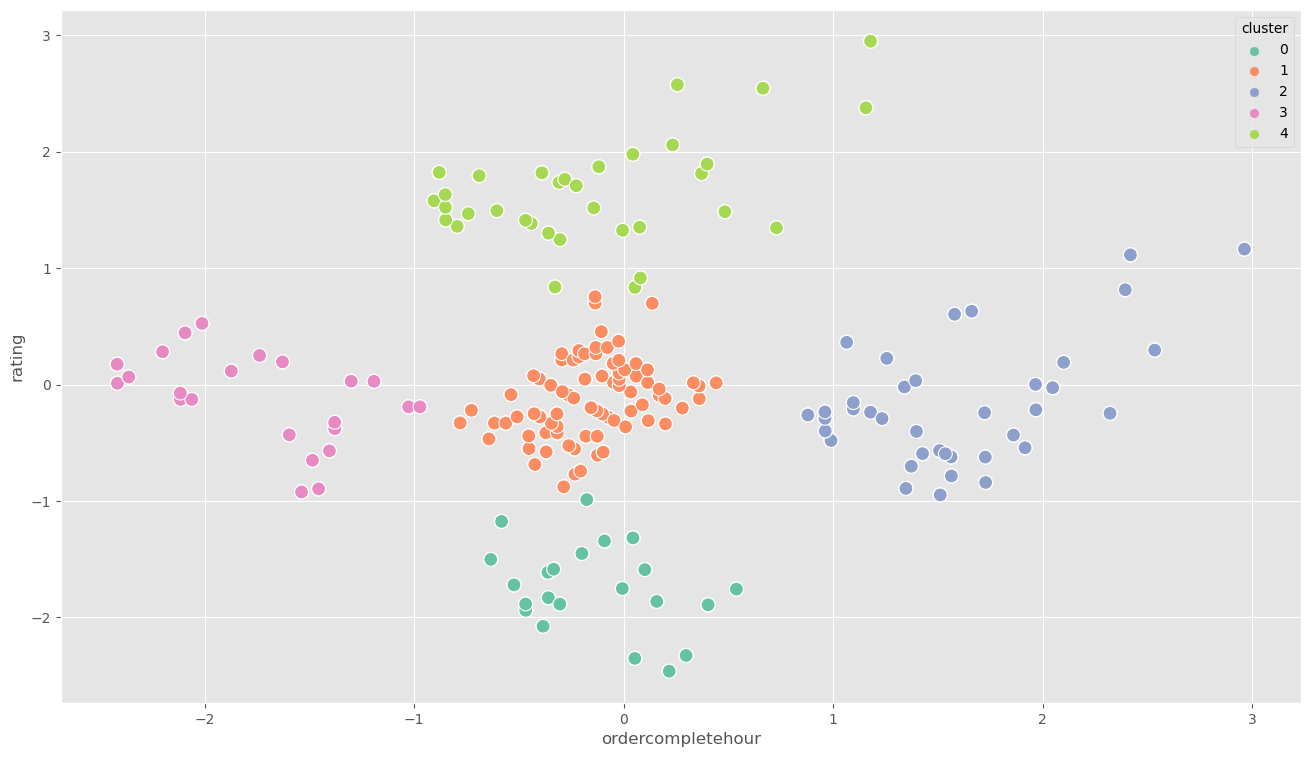

In [865]:
# Seems KMeans is better in Silhoutte and Callinsky Harabasz.
pc_cul = pd.DataFrame(
    pipe["preprocess"].fit_transform(df_sel),
    columns=["ordercompletehour", "rating"],
)

# Plot Clusters
pc_cul["cluster"] = pipe["clusterer"]["KMeans"].labels_
plt.style.use("ggplot")
plt.figure(figsize=(16, 9))
scatter = sns.scatterplot(
    data = pc_cul,
    x="ordercompletehour",
    y="rating",
    hue="cluster",
    s=100,
    palette="Set2"
)

#### Findings about cluster model: 

- It seems that the KMeans method performs better over Agglomerative method in terms of clustering quality for the given dataset and variables. KMeans has higher Silhouette Score, Calinski Harabasz Score, and lower Davies Bouldin Score.

- Given that the number of clusters is set to 5, both KMeans and Agglomerative methods seem to have produced reasonable clustering results. Scores around 0.56 suggest that the clusters are reasonably well-separated but there are some overlaps. Overall, the findings suggest that KMeans may provide better separated clusters.

- For cluster 1, 2, 4 seems gather around rating 0 values not matter when order is completed in hour. It is weird because we expect if we complete orders earlier, rating would be higher. After discussing with company, they doubt customers do not pay attention rating process after completing their order. Also, if customers do not give rating, system assign a default value that is why most of data spread in specific value.